# Time Series for Daily Average Rainfall

In [1]:
#Import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [2]:
#Identify path
path = '/Users/emmabenedict/Desktop/Code/'

In [3]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')

In [4]:
#Load .nc file for CPC
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#Load .nc file for IMERG
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [5]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [6]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [7]:
#Pick out two locations: Athens, GA & Seattle, WA for E3SM
hr_athens = precip_hr.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
hr_seattle = precip_hr.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
mmf_athens = precip_mmf.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
mmf_seattle = precip_mmf.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
#Pick out two locations: Athens, GA & Seattle, WA for Obs
cpc_athens = precip_cpc.sel(lon=276.64,lat=33.95,method="nearest")*25.4*24
cpc_seattle = precip_cpc.sel(lon=237.67,lat=47.60,method="nearest")*25.4*24
img_athens = precip_img.sel(lon=276.64,lat=33.95,method="nearest")*24
img_seattle = precip_img.sel(lon=237.67,lat=47.60,method="nearest")*24

In [18]:
#Use loop to calculate a three month average for HR -- April, May, and June (amj)
#Athens
months = [4,5,6]
amj_hr_athens = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = hr_athens.sel(time=(hr_athens['time.year'] == year) & (hr_athens['time.month'] == month))
        amj_hr_athens.append(monthly_data)

combine_amj_hr_athens = xr.concat(amj_hr_athens, dim='time')
hr_athens_99 = np.percentile(combine_amj_hr_athens,99)
avg_hr_athens = np.mean(combine_amj_hr_athens)

#Seattle
months = [4,5,6]
amj_hr_seattle = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = hr_seattle.sel(time=(hr_seattle['time.year'] == year) & (hr_seattle['time.month'] == month))
        amj_hr_seattle.append(monthly_data)

combine_amj_hr_seattle = xr.concat(amj_hr_seattle, dim='time')
hr_seattle_99 = np.percentile(combine_amj_hr_seattle,99)
avg_hr_seattle = np.mean(combine_amj_hr_seattle)

In [19]:
#Use loop to calculate a three month average for MMF -- April, May, and June (amj)
#Athens
months = [4,5,6]
amj_mmf_athens = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = mmf_athens.sel(time=(mmf_athens['time.year'] == year) & (mmf_athens['time.month'] == month))
        amj_mmf_athens.append(monthly_data)

combine_amj_mmf_athens = xr.concat(amj_mmf_athens, dim='time')
mmf_athens_99 = np.percentile(combine_amj_mmf_athens,99)
avg_mmf_athens = np.mean(combine_amj_mmf_athens)

#Seattle
months = [4,5,6]
amj_mmf_seattle = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = mmf_seattle.sel(time=(mmf_seattle['time.year'] == year) & (mmf_seattle['time.month'] == month))
        amj_mmf_seattle.append(monthly_data)

combine_amj_mmf_seattle = xr.concat(amj_mmf_seattle, dim='time')
mmf_seattle_99 = np.percentile(combine_amj_mmf_seattle,99)
avg_mmf_seattle = np.mean(combine_amj_mmf_seattle)

In [26]:
#Use loop to calculate a three month average for CPC -- April, May, and June (amj)
#Athens
months = [4,5,6]
amj_cpc_athens = []
for year in range(1958, 1997):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = cpc_athens.sel(time=(cpc_athens['time.year'] == year) & (cpc_athens['time.month'] == month))
        amj_cpc_athens.append(monthly_data)

combine_amj_cpc_athens = xr.concat(amj_cpc_athens, dim='time')
filter_athens_cpc = combine_amj_cpc_athens.dropna(dim='time')
cpc_athens_99 = np.percentile(filter_athens_cpc,99)
avg_cpc_athens = np.mean(filter_athens_cpc)

#Seattle
months = [4,5,6]
amj_cpc_seattle = []
for year in range(1958, 1997):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = cpc_seattle.sel(time=(cpc_seattle['time.year'] == year) & (cpc_seattle['time.month'] == month))
        amj_cpc_seattle.append(monthly_data)

combine_amj_cpc_seattle = xr.concat(amj_cpc_seattle, dim='time')
filter_seattle_cpc = combine_amj_cpc_seattle.dropna(dim='time')
cpc_seattle_99 = np.percentile(filter_seattle_cpc,99)
avg_cpc_seattle = np.mean(filter_seattle_cpc)

In [27]:
#Use loop to calculate a three month average for IMERG -- April, May, and June (amj)
#Athens
months = [4,5,6]
amj_img_athens = []
for year in range(2001, 2020):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = img_athens.sel(time=(img_athens['time.year'] == year) & (img_athens['time.month'] == month))
        amj_img_athens.append(monthly_data)

combine_amj_img_athens = xr.concat(amj_img_athens, dim='time')
filter_athens_img = combine_amj_img_athens.dropna(dim='time')
img_athens_99 = np.percentile(filter_athens_img,99)
avg_img_athens = np.mean(filter_athens_img)

#Seattle
months = [4,5,6]
amj_img_seattle = []
for year in range(2001, 2020):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = img_seattle.sel(time=(img_seattle['time.year'] == year) & (img_seattle['time.month'] == month))
        amj_img_seattle.append(monthly_data)

combine_amj_img_seattle = xr.concat(amj_img_seattle, dim='time')
filter_seattle_img = combine_amj_img_seattle.dropna(dim='time')
img_seattle_99 = np.percentile(filter_seattle_img,99)
avg_img_seattle = np.mean(filter_seattle_img)

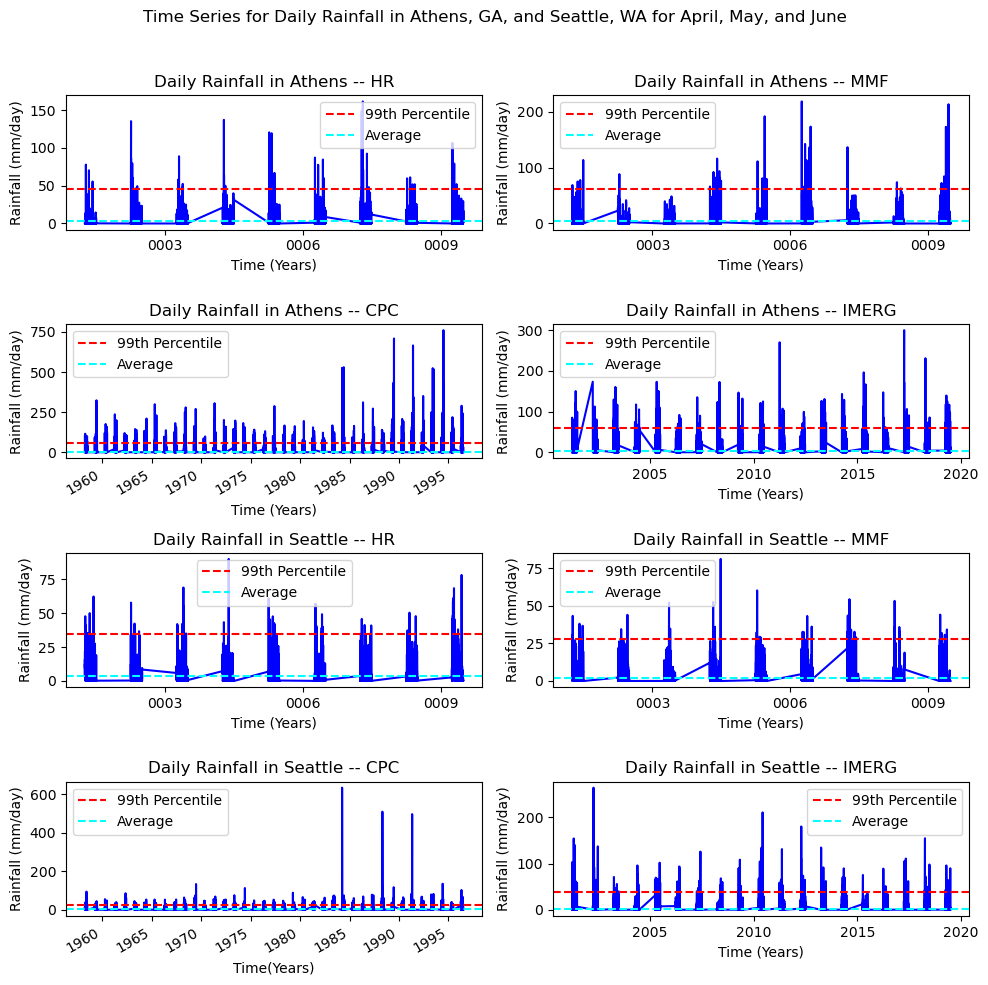

In [29]:
plt.figure(figsize = (10,10))
plt.subplot(4,2,1)
combine_amj_hr_athens.plot(color = "blue")
plt.axhline(y=hr_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_hr_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- HR")

plt.subplot(4,2,2)
combine_amj_mmf_athens.plot(color = "blue")
plt.axhline(y=mmf_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_mmf_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- MMF")

plt.subplot(4,2,3)
combine_amj_cpc_athens.plot(color = "blue")
plt.axhline(y=cpc_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_cpc_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- CPC")

plt.subplot(4,2,4)
combine_amj_img_athens.plot(color = "blue")
plt.axhline(y=img_athens_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_img_athens, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Athens -- IMERG")

plt.subplot(4,2,5)
combine_amj_hr_seattle.plot(color = "blue")
plt.axhline(y=hr_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_hr_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- HR")

plt.subplot(4,2,6)
combine_amj_mmf_seattle.plot(color = "blue")
plt.axhline(y=mmf_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_mmf_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- MMF")

plt.subplot(4,2,7)
combine_amj_cpc_seattle.plot(color = "blue")
plt.axhline(y=cpc_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_cpc_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time(Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- CPC")

plt.subplot(4,2,8)
combine_amj_img_seattle.plot(color = "blue")
plt.axhline(y=img_seattle_99, color='red', linestyle='--', label='99th Percentile')
plt.axhline(y=avg_img_seattle, color='cyan', linestyle='--', label='Average')
plt.xlabel("Time (Years)")
plt.ylabel("Rainfall (mm/day)")
plt.legend()
plt.title("Daily Rainfall in Seattle -- IMERG")

plt.suptitle('Time Series for Daily Rainfall in Athens, GA, and Seattle, WA for April, May, and June', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()